# Exploratory Analysis
This notebook performs exploratory data analysis for WWLLN lightning and storm track files. We compare the unfiltered and filtered datasets for all lightning strokes, where the filtered dataset only includes TCs that are category 1 or higher. For more details on how category 1 is defined, refer to this [README](../README.md#background-information).

This notebook should be executed after the `data_pipeline/` notebooks.

This notebook includes the following sections:
- Exploratory Analysis for Overall Lightning
    - Lightning Count During a TC
    - Storm Counts per Year
    - Average Lightning Occurrences by Hour
    - Tropical Cyclone Duration
- Exploratory Analysis for Wind and Pressure
    - Peak Intensity and Least Intensity
    - Intensity Percent Difference
    - Pressure-Wind Speed Relationship
- Plotting Storm Center and Lightning Density
    - Seymour (EPAC_16_20)
    - Hagibis (WPAC_19_20)
    - Jose (ATL_17_12)

In Exploratory Analysis for Overall Lightning, we look at the overall lightning count distribution, average lightning stroke counts by hour, the number of storms per year, and the distribution of TC durations. We do not split by basin in this section.

In Exploratory Analysis for Wind and Pressure, we focus on the wind and pressure data in the track files for each TC. We look at the peak intensity and least intensity for each TC, the intensity percent difference (max/min wind and pressure), and the pressure-wind speed relationship. We break the pressure-wind speed relationship data by basin to understand the differences in behavior between basins.

In Plotting Storm Center and Lightning Density, we look at a few specific storms and recreate the plots found on the [WWLLN site](https://wwlln.net/storms/). We plot the lightning density for a particular day and the storm center path over the duration of the storm. 

## Requirements
This notebook requires the following libraries not built-in to Python:
- cartopy
- matplotlib
- numpy
- pandas
- polars
- seaborn

This notebook requires the following files in [data_pipeline/intermediate_data/](../data_pipeline/intermediate_data/)
- `Combined_Reduced_Trackfile.txt`
- `Combined_WWLLN_Locations.txt` - in [Google Drive](https://drive.google.com/drive/folders/105AYgecVORsUCyOwinQRfb--TC0hhBva?usp=drive_link)
- `Filtered_Reduced_Trackfile.csv`
- `Filtered_WWLLN_Locations.txt` - in [Google Drive](https://drive.google.com/drive/folders/105AYgecVORsUCyOwinQRfb--TC0hhBva?usp=drive_link)

## Code
### Exploratory Analysis for Overall Lightning
Start by importing necessary libraries and files.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import WWLLN file
file_path = "../data_pipeline/intermediate_data/Combined_WWLLN_Locations.txt"
data = pd.read_csv(file_path)
# Add columns to dataframe
data.columns = ['year', 'month', 'day', 'hour', 'min', 'sec','lat','lon','distance_from_storm_center_km_east', 'distance_from_storm_center_km_north', 'storm_code','storm_name']

print(data.head())

   year  month  day  hour  min      sec      lat      lon  \
0  2011      7   28     1    7  57.4687   3.2448 -44.0808   
1  2011      7   28     2   17  38.7138  10.0862 -24.7260   
2  2011      7   28     2   17  38.7632  10.0756 -24.6255   
3  2011      7   28     2   17  38.7897  10.1114 -24.8444   
4  2011      7   28     2   24  39.0709  10.1117 -25.0140   

   distance_from_storm_center_km_east  distance_from_storm_center_km_north  \
0                            -1102.31                             -500.725   
1                             1059.46                              255.324   
2                             1070.50                              254.146   
3                             1046.42                              258.127   
4                             1027.85                              258.160   

  storm_code storm_name  hypotenuse_disance_from_storm_center  inner_core_ind  
0   ATL_11_5      Emily                           1210.707587               0  
1   

In [20]:
# Import track file
file_path = "../data_pipeline/intermediate_data/Combined_Reduced_Trackfile.txt"
track_data = pd.read_csv(file_path, delimiter="\t")
# Drop the extra column of 0's
track_data = track_data.drop(track_data.columns[8], axis=1)
# Add columns to dataframe
track_data.columns = ['year', 'month', 'day','hour','lat','lon','pressure', 'knots', 'storm_code', 'storm_name']

track_data.head()

,year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name
0,2015,3,10,6,6.3,175.3,1007,20,WPAC_15_3,Bavi
1,2015,3,10,12,6.3,174.1,1007,20,WPAC_15_3,Bavi
2,2015,3,10,18,6.3,172.8,1002,20,WPAC_15_3,Bavi
3,2015,3,11,0,6.4,171.5,1002,20,WPAC_15_3,Bavi
4,2015,3,11,6,6.9,169.9,1007,20,WPAC_15_3,Bavi


In [19]:
# Import filtered track file
file_path = "../data_pipeline/intermediate_data/Filtered_Reduced_Trackfile.csv"
filtered_track_data = pd.read_csv(file_path)

filtered_track_data.head()

,year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name,category,basin
0,2020,10,20,0,12.1,-80.0,0,15,ATL_20_28,Zeta,2,ATL
1,2020,10,20,6,12.5,-80.1,0,15,ATL_20_28,Zeta,2,ATL
2,2020,10,20,12,12.8,-80.2,0,15,ATL_20_28,Zeta,2,ATL
3,2020,10,20,18,13.2,-80.3,0,15,ATL_20_28,Zeta,2,ATL
4,2020,10,21,0,13.8,-80.4,0,15,ATL_20_28,Zeta,2,ATL


#### Lightning Count During a TC
Let's look at the distribution of total lightning counts across different TCs. We get the total sum of lightning strokes per TC and plot them below. Each bar is one TC's lighting count, sorted from most lightning strokes to least.

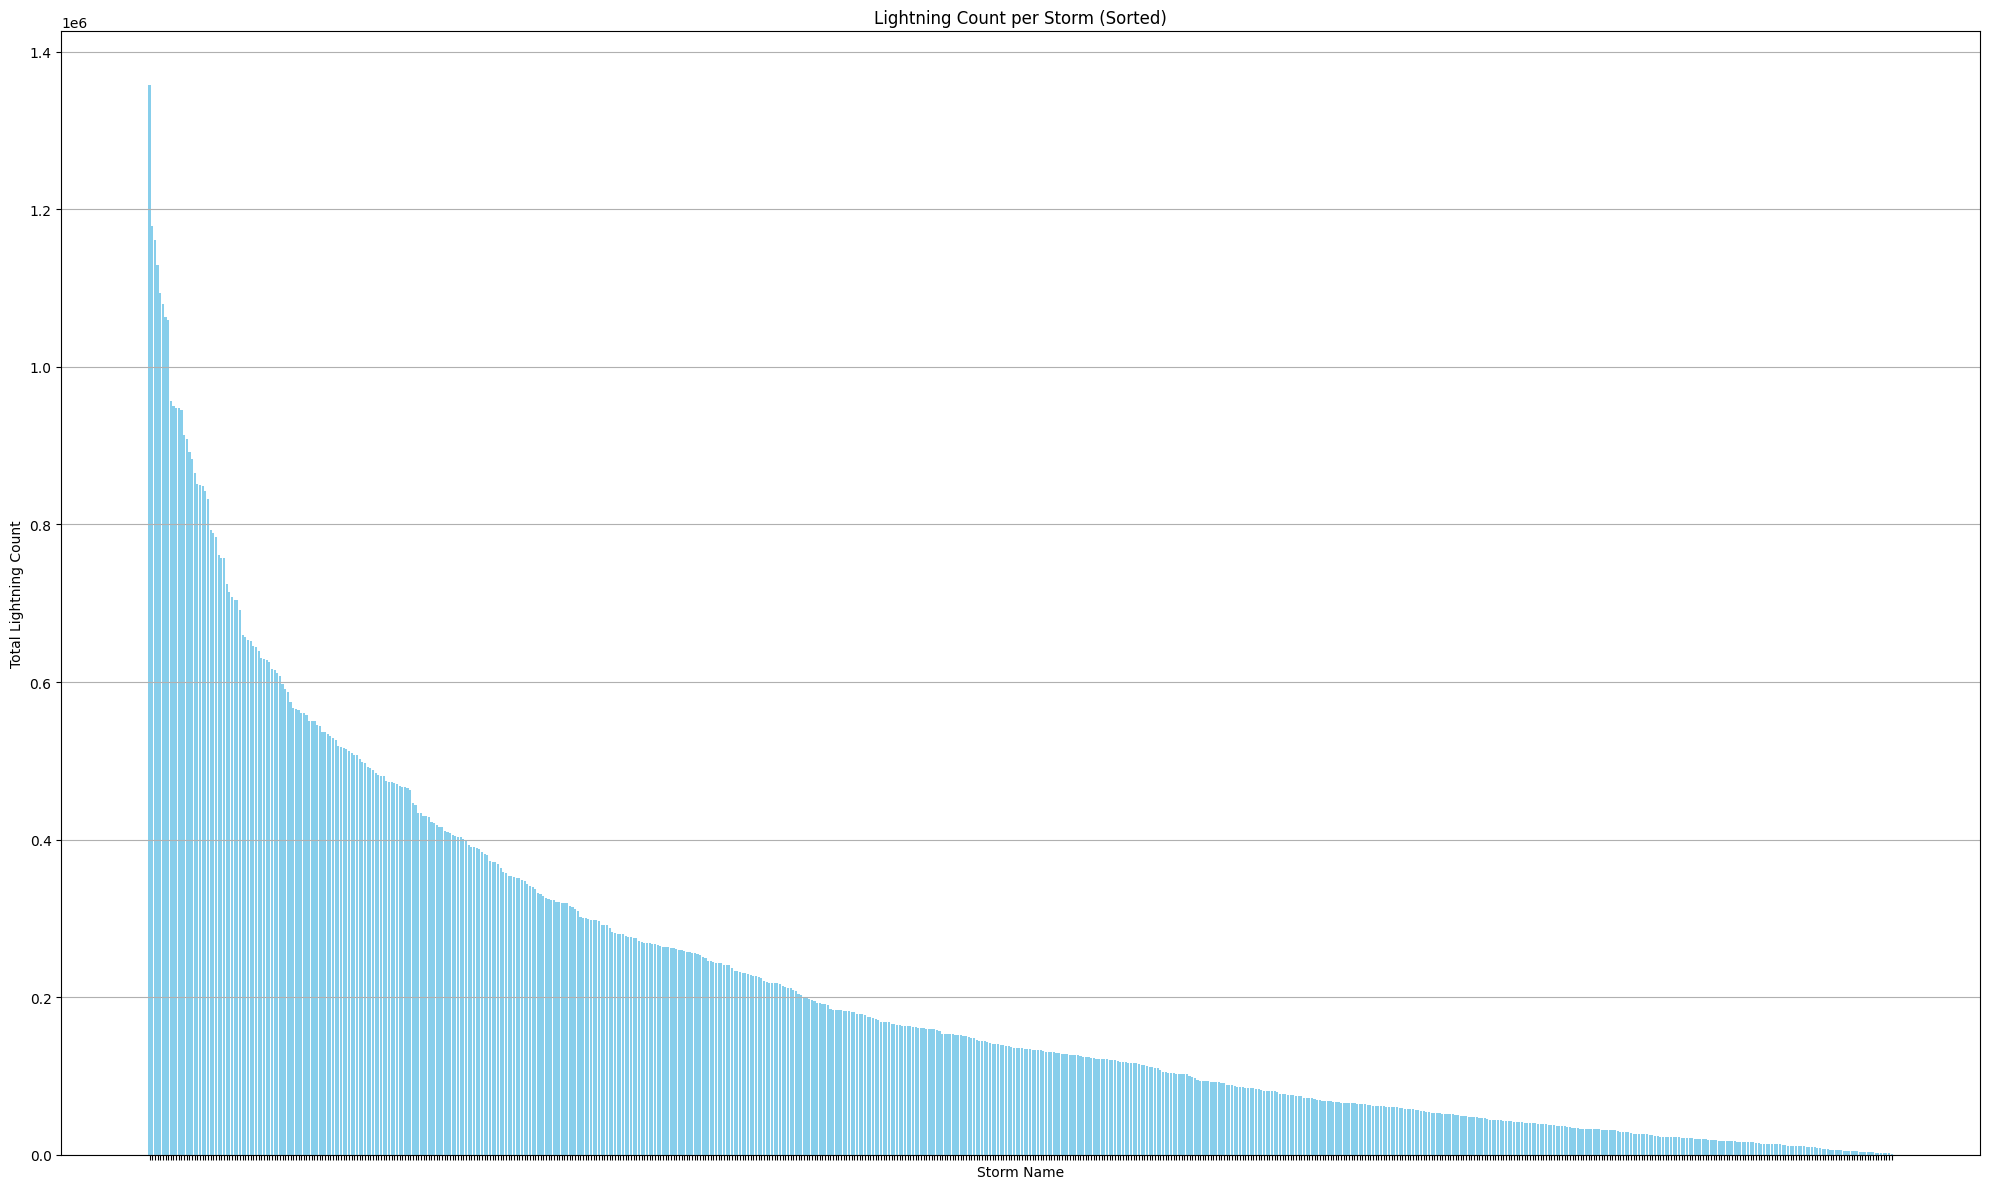

In [ ]:
# Calculate lightning count per storm by counting rows per storm
lightning_count = data.groupby('storm_name').size().reset_index(name='lightning_count')
# Sort the counts descending
lightning_count_sorted = lightning_count.sort_values(by='lightning_count', ascending=False)
# Create bar plot
plt.figure(figsize=(20,12))
plt.bar(lightning_count_sorted['storm_name'], lightning_count_sorted['lightning_count'], color='skyblue')
plt.xticks(visible=False)
plt.title('Lightning Count per Storm (Sorted)')
plt.xlabel('Storm Name')
plt.ylabel('Total Lightning Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

We look at the same data in histogram form below.

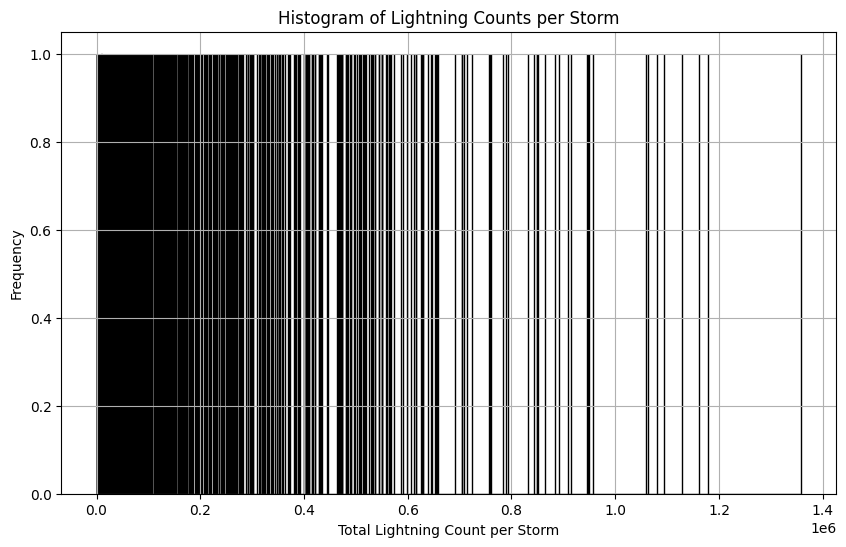

In [ ]:
# Histogram of total lightning counts
plt.figure(figsize=(10,6))
plt.hist(lightning_count['lightning_count'], bins=range(1, lightning_count['lightning_count'].max() + 2), edgecolor='black', color='skyblue')
plt.title('Histogram of Lightning Counts per Storm')
plt.xlabel('Total Lightning Count per Storm')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### Storm Counts per Year
Let's explore how many TCs occur each year in our unfiltered dataset. Start by grouping the data by year and storm code.

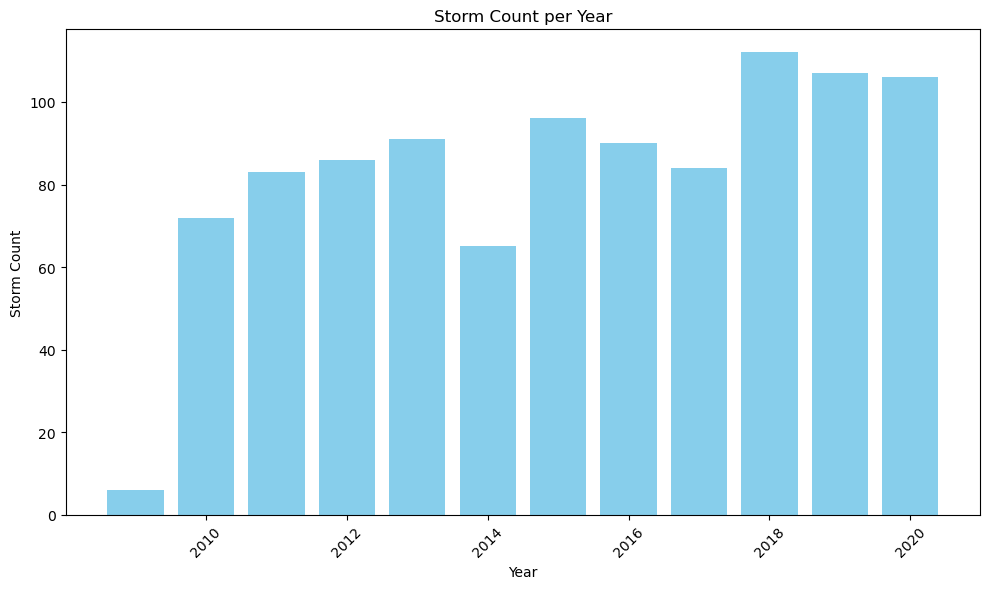

In [15]:
storm_year = track_data[['storm_code', 'year']].drop_duplicates()
storm_counts = storm_year.groupby('year').size().reset_index(name='storm_count')

plt.figure(figsize=(10, 6))
plt.bar(storm_counts['year'], storm_counts['storm_count'], color='skyblue')
plt.title('Storm Count per Year')
plt.xlabel('Year')
plt.ylabel('Storm Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

We can compare this to our filtered dataset by plotting the same using the filtered track file.

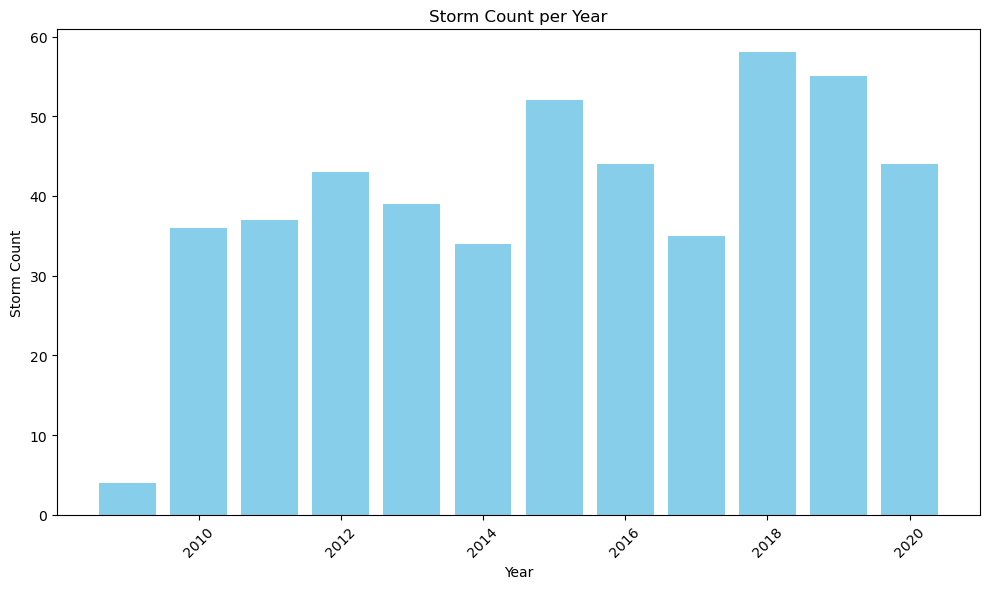

In [21]:
filtered_storm_year = filtered_track_data[['storm_code', 'year']].drop_duplicates()
filtered_storm_counts = filtered_storm_year.groupby('year').size().reset_index(name='storm_count')

plt.figure(figsize=(10, 6))
plt.bar(filtered_storm_counts['year'], filtered_storm_counts['storm_count'], color='skyblue')
plt.title('Storm Count per Year')
plt.xlabel('Year')
plt.ylabel('Storm Count')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The distribution between the two datasets look similar, with a similar shape between the two. It looks like less storms in 2020 meet the category 1 criteria relative to other years.

#### Average Lightning Occurrences by hour
Next, let's look at the average number of lightning strokes per hour of the day across all TCs in the unfiltered dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

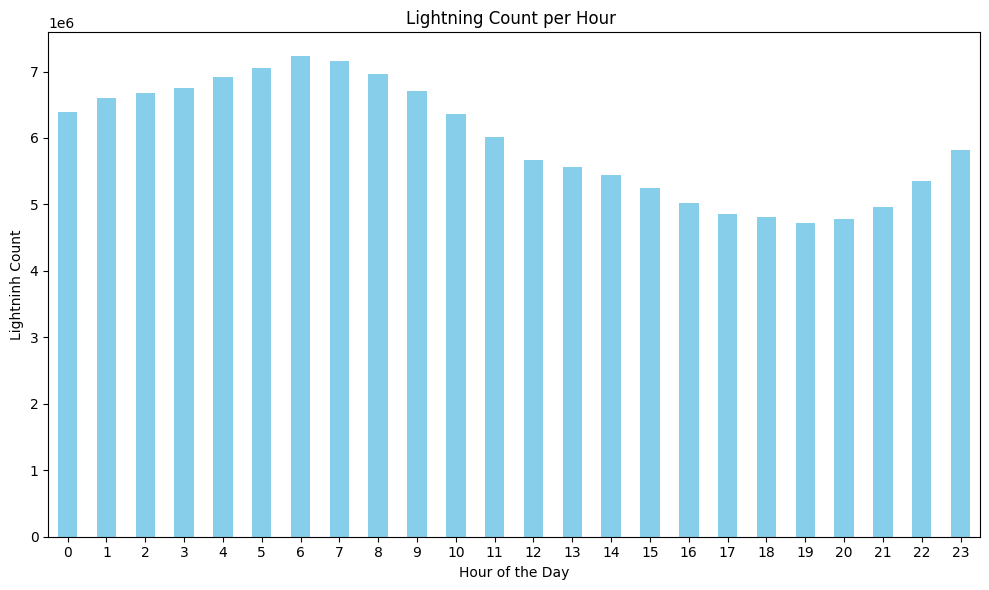

In [ ]:
# Get the lightning count per hour across all TCs
lightning_count_per_hour = data['hour'].value_counts().sort_index()

# Plot the storm count per hour
plt.figure(figsize=(10, 6))
lightning_count_per_hour.plot(kind='bar', color='skyblue')
plt.title(f'Lightning Count per Hour ')
plt.xlabel('Hour of the Day')
plt.ylabel('Lightninh Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

Let's take a look at one storm in particular. We'll look at the storm with the most lightning, Zeta (ATL_20_28).

Storm with most lightning: ATL_20_28


<function matplotlib.pyplot.show(close=None, block=None)>

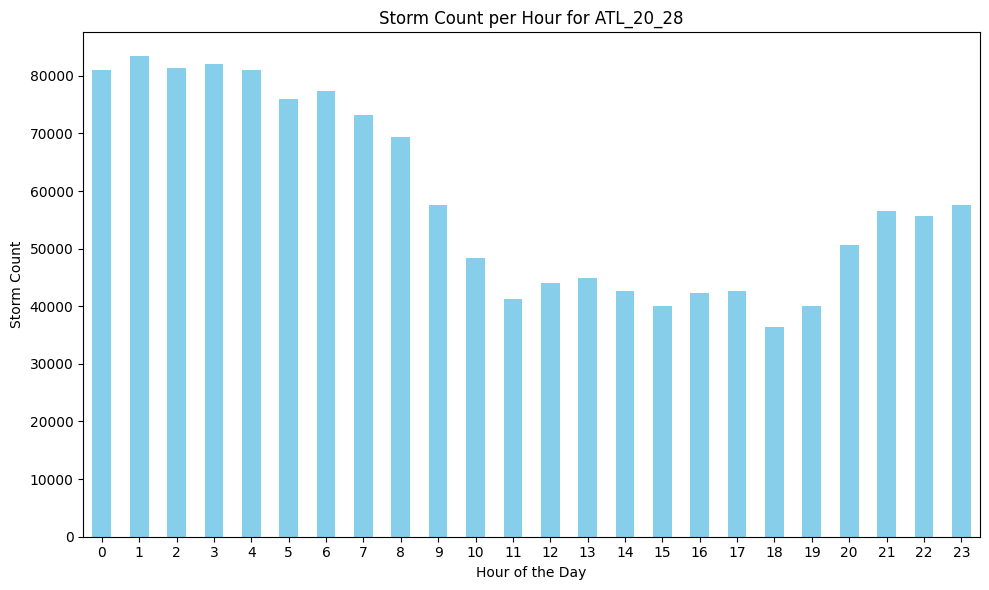

In [ ]:
# Get storm with the max lighting counts
storm_counts = data['storm_code'].value_counts()
storm_with_most_lightning = storm_counts.idxmax()
print(f"Storm with most lightning: {storm_with_most_lightning}")

# Filter the data for the storm with the most lightning
filtered_df = data[data['storm_code'] == storm_with_most_lightning]

# Count storm occurrences per hour
storm_count_per_hour = filtered_df['hour'].value_counts().sort_index()

# Plot the storm count per hour
plt.figure(figsize=(10, 6))
storm_count_per_hour.plot(kind='bar', color='skyblue')
plt.title(f'Storm Count per Hour for {storm_with_most_lightning}')
plt.xlabel('Hour of the Day')
plt.ylabel('Storm Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show

#### Tropical Cyclone Duration
Let's look at how long TCs last using the track data.

In [39]:
# Create a 'datetime' column by combining year, month, day, hour into a datetime string
track_data['datetime'] = pd.to_datetime(track_data[['year', 'month', 'day', 'hour']])

# Sort by storm_code and datetime
df = track_data.sort_values(by=['storm_code', 'datetime'])

# Calculate the storm duration for each storm
# Group by storm_code and calculate the difference between the first and last datetime
storm_duration = df.groupby('storm_code').agg(
    storm_start=('datetime', 'min'),
    storm_end=('datetime', 'max')
)

# Calculate the duration in timedelta
storm_duration['duration'] = storm_duration['storm_end'] - storm_duration['storm_start']

# Display the results
storm_duration[['storm_start', 'storm_end', 'duration']]

,storm_start,storm_end,duration
storm_code,,,
ATL_10_1,2010-06-20 18:00:00,2010-07-01 18:00:00,11 days 00:00:00
ATL_10_10,2010-09-04 06:00:00,2010-09-06 00:00:00,1 days 18:00:00
ATL_10_11,2010-09-07 00:00:00,2010-09-21 18:00:00,14 days 18:00:00
ATL_10_12,2010-09-12 06:00:00,2010-09-24 12:00:00,12 days 06:00:00
ATL_10_13,2010-09-09 12:00:00,2010-09-18 00:00:00,8 days 12:00:00
...,...,...,...
WPAC_20_5,2020-08-06 12:00:00,2020-08-11 06:00:00,4 days 18:00:00
WPAC_20_6,2020-08-09 00:00:00,2020-08-13 00:00:00,4 days 00:00:00
WPAC_20_7,2020-08-08 12:00:00,2020-08-12 00:00:00,3 days 12:00:00


Let's look at the distribution of TC storm lengths by plotting a histogram of the durations.

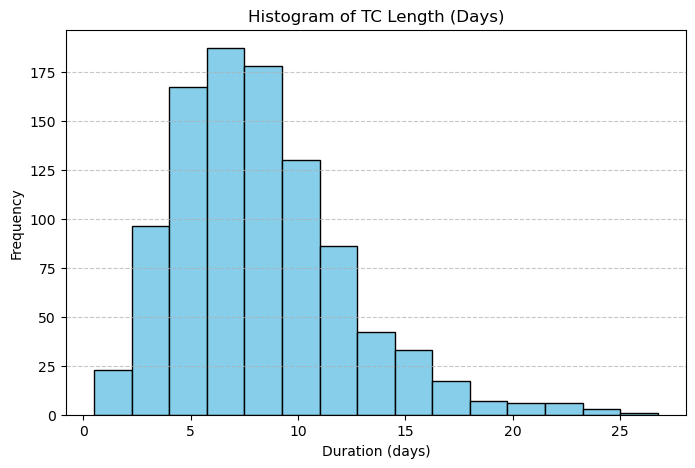

In [35]:
# Grab the duration column
time_deltas = storm_duration['duration']

# Convert timedelta to days
time_deltas_days = time_deltas / pd.Timedelta(days=1)  # Converts to float days

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(time_deltas_days, bins=15, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.title("Histogram of TC Length (Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Let's look at the min, max, average, and median storm lengths for the unfiltered dataset.

In [42]:
min_duration = storm_duration['duration'].min()
max_duration = storm_duration['duration'].max()
avg_duration = storm_duration['duration'].mean()
med_duration = storm_duration['duration'].median()

print(f"Minimum storm duration: {min_duration:} ")
print(f"Maximum storm duration: {max_duration:} ")
print(f"Average storm duration: {avg_duration:} ")
print(f"Median storm duration: {med_duration:} ")

Minimum storm duration: 0 days 12:00:00 
Maximum storm duration: 26 days 18:00:00 
Average storm duration: 8 days 02:16:44.480651731 
Median storm duration: 7 days 18:00:00 


We can see that most of the TCs last between 5-10 days long, with the average being 8 days and median at 7 days. Let's do the same for the filtered dataset and compare.

In [43]:
# Create a 'datetime' column by combining year, month, day, hour into a datetime string
filtered_track_data['datetime'] = pd.to_datetime(filtered_track_data[['year', 'month', 'day', 'hour']])

# Sort by storm_code and datetime
df = filtered_track_data.sort_values(by=['storm_code', 'datetime'])

# Calculate the storm duration for each storm
# Group by storm_code and calculate the difference between the first and last datetime
storm_duration = df.groupby('storm_code').agg(
    storm_start=('datetime', 'min'),
    storm_end=('datetime', 'max')
)

# Calculate the duration in timedelta
storm_duration['duration'] = storm_duration['storm_end'] - storm_duration['storm_start']

# Display the results
storm_duration[['storm_start', 'storm_end', 'duration']]

,storm_start,storm_end,duration
storm_code,,,
ATL_10_1,2010-06-20 18:00:00,2010-07-01 18:00:00,11 days 00:00:00
ATL_10_11,2010-09-07 00:00:00,2010-09-21 18:00:00,14 days 18:00:00
ATL_10_12,2010-09-12 06:00:00,2010-09-24 12:00:00,12 days 06:00:00
ATL_10_13,2010-09-09 12:00:00,2010-09-18 00:00:00,8 days 12:00:00
ATL_10_14,2010-09-20 00:00:00,2010-09-28 18:00:00,8 days 18:00:00
...,...,...,...
WPAC_20_22,2020-10-25 06:00:00,2020-11-07 00:00:00,12 days 18:00:00
WPAC_20_25,2020-11-08 00:00:00,2020-11-16 00:00:00,8 days 00:00:00
WPAC_20_3,2020-07-31 00:00:00,2020-08-06 00:00:00,6 days 00:00:00


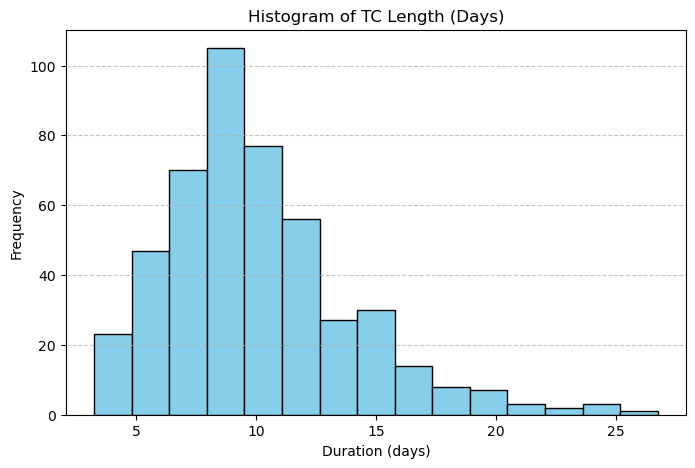

In [37]:
# Grab the duration column
time_deltas = storm_duration['duration']

# Convert timedelta to days
time_deltas_days = time_deltas / pd.Timedelta(days=1)  # Converts to float days

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(time_deltas_days, bins=15, color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.title("Histogram of TC Length (Days)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

We can see that much more of the category 1 or higher storms last around 7-10 days, with the distribution having a much more obvious peak than the unfiltered TC dataset.

In [45]:
min_duration = storm_duration['duration'].min()
max_duration = storm_duration['duration'].max()
avg_duration = storm_duration['duration'].mean()
med_duration = storm_duration['duration'].median()

print(f"Minimum storm duration: {min_duration:} ")
print(f"Maximum storm duration: {max_duration:} ")
print(f"Average storm duration: {avg_duration:} ")
print(f"Median storm duration: {med_duration:} ")

Minimum storm duration: 3 days 06:00:00 
Maximum storm duration: 26 days 18:00:00 
Average storm duration: 10 days 02:17:45.539112050 
Median storm duration: 9 days 12:00:00 


We can see from these numbers that average and median storm durations for the filtered dataset is higher than the unfiltered dataset, which makes sense as we kept only the stronger storms. 

### Exploratory Analysis for Wind and Pressure
In this section we explore the wind and pressure data presented in the track files. We can restart our kernel here to free up memory before importing the necessary libraries and files.

In [1]:
# Import libraries
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [20]:
# Import filtered track data
filtered_storm_data = pl.read_csv("../data_pipeline/intermediate_data/Filtered_Reduced_Trackfile.csv")
storm_data = pl.read_csv("../data_pipeline/intermediate_data/Combined_Reduced_Trackfile.txt", separator = '\t')
# Drop the extra column (index 8)
storm_data = storm_data.drop(storm_data.columns[8])

# Rename columns
storm_data = storm_data.rename({
    storm_data.columns[0]: 'year',
    storm_data.columns[1]: 'month',
    storm_data.columns[2]: 'day',
    storm_data.columns[3]: 'hour',
    storm_data.columns[4]: 'lat',
    storm_data.columns[5]: 'lon',
    storm_data.columns[6]: 'pressure',
    storm_data.columns[7]: 'knots',
    storm_data.columns[8]: 'storm_code',
    storm_data.columns[9]: 'storm_name',
})
storm_data = storm_data.with_columns(
    storm_data["storm_code"].str.extract(r"^(.*?)_").alias("basin")
)

In [21]:
# Clean up null pressure data
storm_data = storm_data.with_columns(
    pl.when(pl.col("pressure") == 0)
    .then(None)  # Replace 0 with None -> 0 is not possible, treat these as null but don't remove row bc the wind speed value is valid
    .otherwise(pl.col("pressure"))
    .alias("pressure")  # Keep the column name as "pressure"
)
storm_data.head()

filtered_storm_data = filtered_storm_data.with_columns(
    pl.when(pl.col("pressure") == 0)
    .then(None)  # Replace 0 with None -> 0 is not possible, treat these as null but don't remove row bc the wind speed value is valid
    .otherwise(pl.col("pressure"))
    .alias("pressure")  # Keep the column name as "pressure"
)
filtered_storm_data.head()

year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name,category,basin
i64,i64,i64,i64,f64,f64,i64,i64,str,str,i64,str
2020,10,20,0,12.1,-80.0,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,6,12.5,-80.1,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,12,12.8,-80.2,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,20,18,13.2,-80.3,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""
2020,10,21,0,13.8,-80.4,null,15,"""ATL_20_28""","""Zeta""",2,"""ATL"""


#### Peak Intensity and Least Intensity
Let's look at the distribution of peak intensity and least intensity. We define peak intensity as minimum pressure and maximum wind speed, and least intensity as maximum pressure and minimum wind speed. Start with the unfiltered dataset.

In [33]:
# Peak intensity -> min pressure, max wind speed
peak_intensity = storm_data.group_by('storm_code', 'basin').agg(
    [pl.col('pressure').min().alias('min_pressure'),
     pl.col('knots').max().alias('max_wind_speed')]
)

peak_intensity.head()

storm_code,basin,min_pressure,max_wind_speed
str,str,i64,i64
"""ATL_19_14""","""ATL""",995,55
"""EPAC_19_10""","""EPAC""",990,60
"""EPAC_10_6""","""EPAC""",1006,30
"""EPAC_11_8""","""EPAC""",1002,30
"""SHEM_17_13""","""SHEM""",944,105


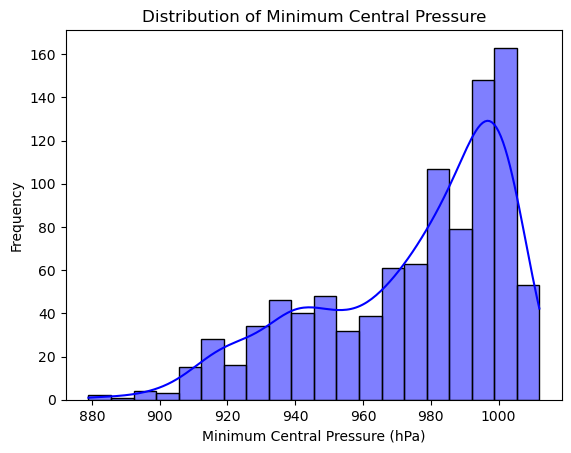

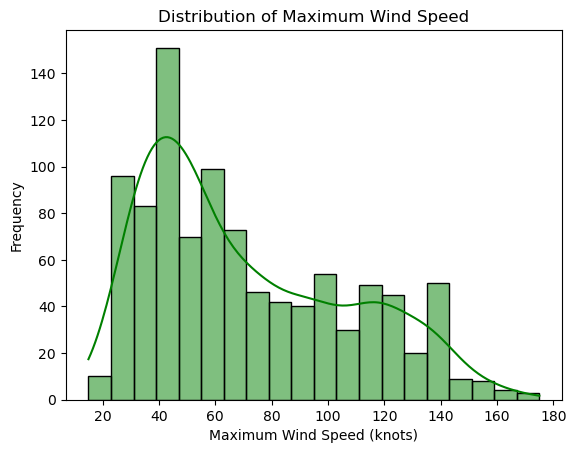

In [34]:
# Histogram of minimum pressure
sns.histplot(peak_intensity['min_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Minimum Central Pressure')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of maximum wind speed
sns.histplot(peak_intensity['max_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Maximum Wind Speed')
plt.xlabel('Maximum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Least intensity - max pressure, min wind speed
least_intensity = storm_data.group_by('storm_code').agg(
    [pl.col('pressure').max().alias('max_pressure'),
     pl.col('knots').min().alias('min_wind_speed')]
)

least_intensity.head()

storm_code,max_pressure,min_wind_speed
str,i64,i64
"""SHEM_14_23""",1010,15
"""ATL_19_14""",997,50
"""WPAC_13_6""",1010,15
"""SHEM_15_21""",1007,20
"""IO_11_1""",1004,25


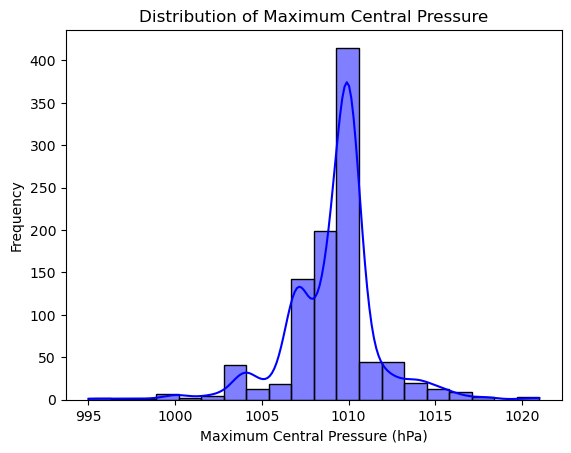

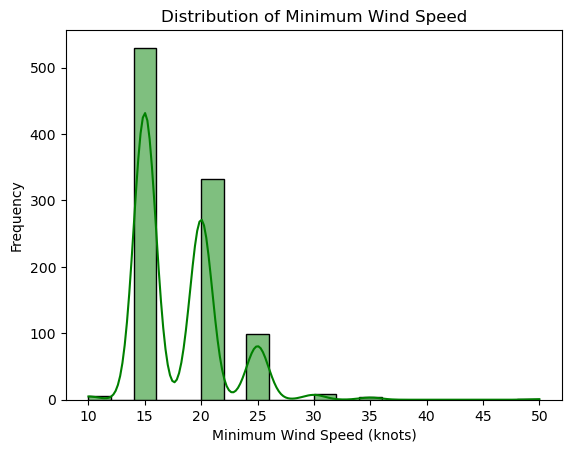

In [36]:
# Histogram of maximum pressure
sns.histplot(least_intensity['max_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Maximum Central Pressure')
plt.xlabel('Maximum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(least_intensity['min_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Minimum Wind Speed')
plt.xlabel('Minimum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

Let's do the same for the filtered dataset.

In [37]:
# Peak intensity -> min pressure, max wind speed
peak_intensity_fil = filtered_storm_data.group_by('storm_code', 'basin').agg(
    [pl.col('pressure').min().alias('min_pressure'),
     pl.col('knots').max().alias('max_wind_speed')]
)

peak_intensity_fil.head()

storm_code,basin,min_pressure,max_wind_speed
str,str,i64,i64
"""ATL_17_14""","""ATL""",962,100
"""EPAC_16_13""","""EPAC""",947,120
"""WPAC_12_14""","""WPAC""",970,70
"""SHEM_13_21""","""SHEM""",959,85
"""ATL_11_9""","""ATL""",942,105


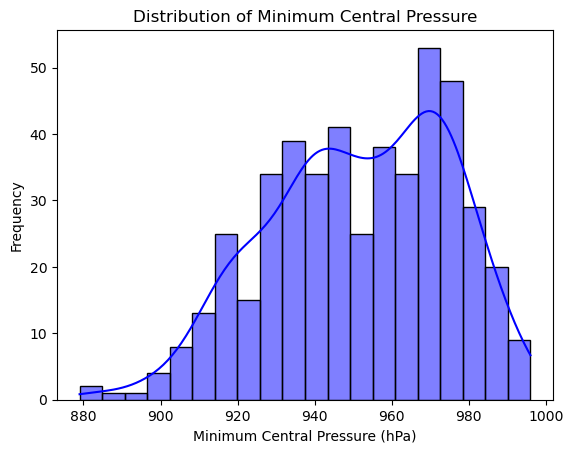

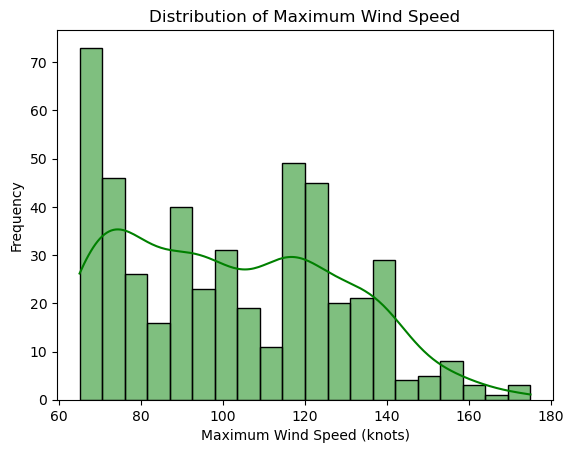

In [38]:
# Histogram of minimum pressure
sns.histplot(peak_intensity_fil['min_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Minimum Central Pressure')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of maximum wind speed
sns.histplot(peak_intensity_fil['max_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Maximum Wind Speed')
plt.xlabel('Maximum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

We see that the maximum wind speed distribution is just a cut version of the unfiltered version, since we used maximum wind speed as our filter. We can also see that the minimum pressure distribution is much less skewed than the unfiltered version, which makes sense as we expect our filtered dataset to include more of the lower pressure values. Let's continue with least intensity.

In [39]:
# Least intensity -> max pressure, min wind speed
least_intensity_fil = filtered_storm_data.group_by('storm_code').agg(
    [pl.col('pressure').max().alias('max_pressure'),
     pl.col('knots').min().alias('min_wind_speed')]
)

least_intensity_fil.head()

storm_code,max_pressure,min_wind_speed
str,i64,i64
"""WPAC_10_15""",1010,15
"""WPAC_13_17""",1010,15
"""WPAC_13_26""",1010,15
"""WPAC_13_31""",1010,15
"""ATL_12_18""",1009,20


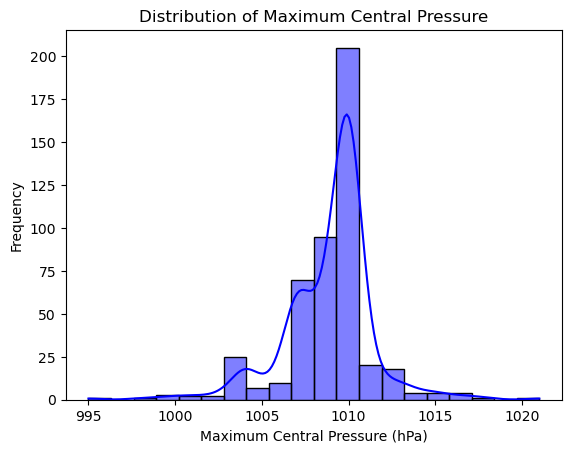

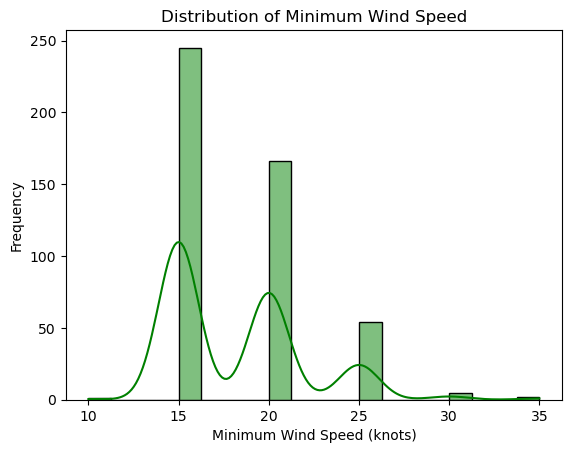

In [40]:
# Histogram of maximum pressure
sns.histplot(least_intensity_fil['max_pressure'], kde=True, bins=20, color='blue')
plt.title('Distribution of Maximum Central Pressure')
plt.xlabel('Maximum Central Pressure (hPa)')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(least_intensity_fil['min_wind_speed'], kde=True, bins=20, color='green')
plt.title('Distribution of Minimum Wind Speed')
plt.xlabel('Minimum Wind Speed (knots)')
plt.ylabel('Frequency')
plt.show()

#### Intensity Percent Difference
Next, we'll explore the percent difference between peak and least intensity for each TC. Start with the unfiltered dataset.

In [41]:
# Percent difference for pressure and wind speed
pct_difference = peak_intensity.join(least_intensity, on="storm_code", how="inner")
pct_difference = pct_difference.with_columns(
    ((pl.col("max_pressure") - pl.col("min_pressure")) / pl.col("min_pressure") * 100)
    .alias("pressure_pct_change"),
    ((pl.col("max_wind_speed") - pl.col("min_wind_speed")) / pl.col("min_wind_speed") * 100)
    .alias("wind_pct_change")
)

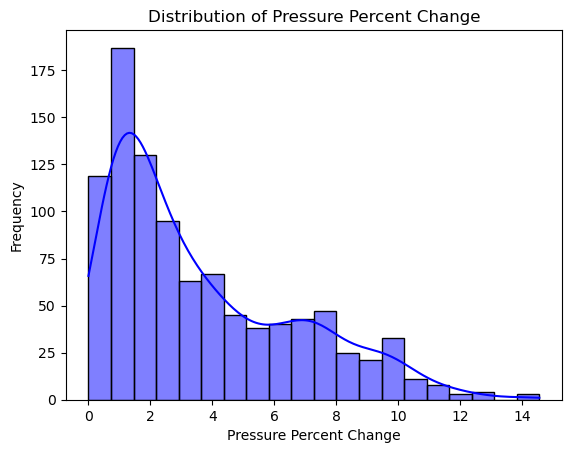

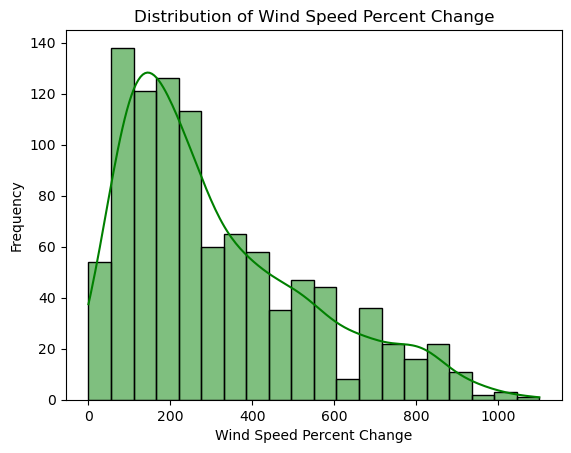

In [42]:
# Histogram of pressure percent change
sns.histplot(pct_difference['pressure_pct_change'], kde=True, bins=20, color='blue')
plt.title('Distribution of Pressure Percent Change')
plt.xlabel('Pressure Percent Change')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(pct_difference['wind_pct_change'], kde=True, bins=20, color='green')
plt.title('Distribution of Wind Speed Percent Change')
plt.xlabel('Wind Speed Percent Change')
plt.ylabel('Frequency')
plt.show()

We see that both distributions are skewed to the right. Let's look at the filtered dataset next.

In [44]:
# Percent difference for pressure and wind speed
pct_difference_fil = peak_intensity_fil.join(least_intensity_fil, on="storm_code", how="inner")
pct_difference_fil = pct_difference_fil.with_columns(
    ((pl.col("max_pressure") - pl.col("min_pressure")) / pl.col("min_pressure") * 100)
    .alias("pressure_pct_change"),
    ((pl.col("max_wind_speed") - pl.col("min_wind_speed")) / pl.col("min_wind_speed") * 100)
    .alias("wind_pct_change")
)

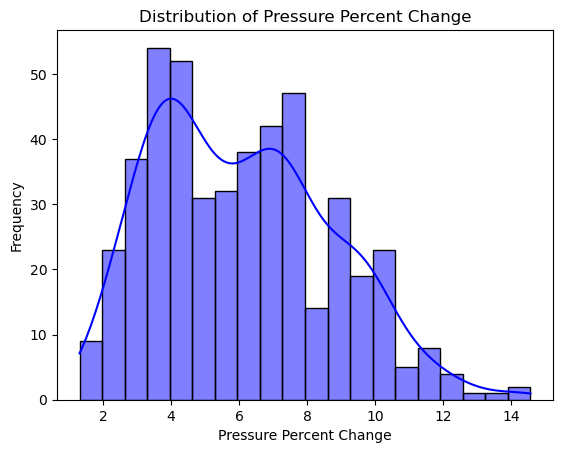

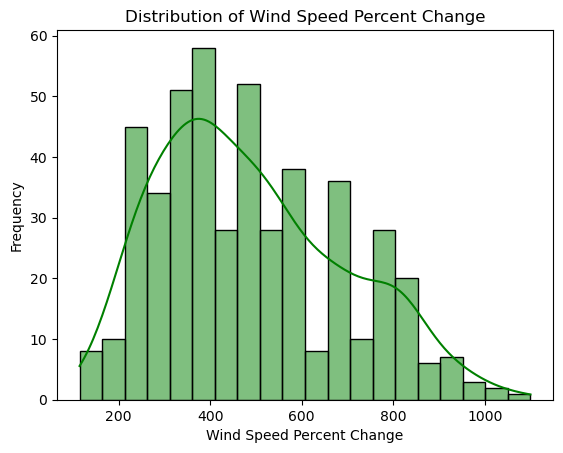

In [45]:
# Histogram of pressure percent change
sns.histplot(pct_difference_fil['pressure_pct_change'], kde=True, bins=20, color='blue')
plt.title('Distribution of Pressure Percent Change')
plt.xlabel('Pressure Percent Change')
plt.ylabel('Frequency')
plt.show()

# Histogram of minimum wind speed
sns.histplot(pct_difference_fil['wind_pct_change'], kde=True, bins=20, color='green')
plt.title('Distribution of Wind Speed Percent Change')
plt.xlabel('Wind Speed Percent Change')
plt.ylabel('Frequency')
plt.show()

We can see that the distributions for the filtered dataset are much less skewed, with the peak of the wind speed percent change distribution closer to 400% (vs the unfiltered distribution's peak is around 200%).

#### Pressure-Wind Speed Relationship
Next, we explore the relationship between pressure and wind speed for the datasets at both the overall level and by basin. Start with the unfiltered dataset.

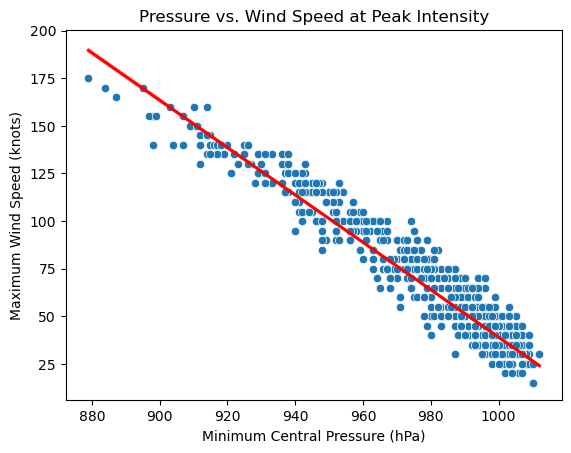

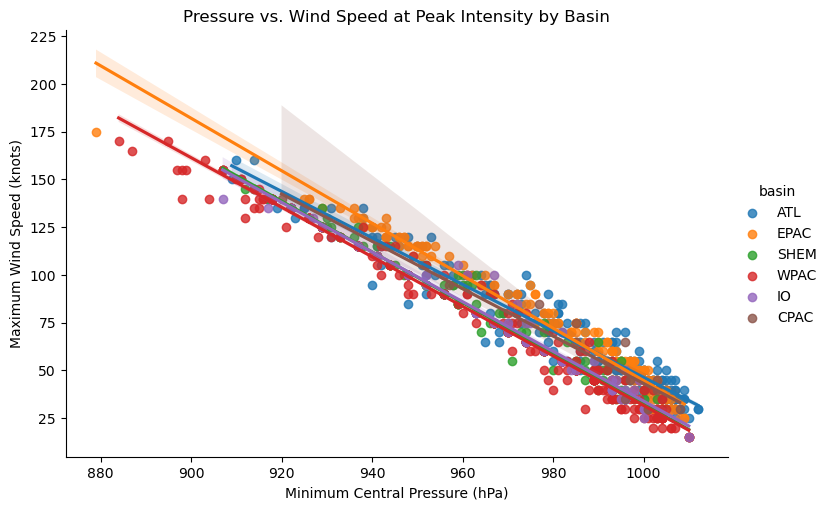

In [47]:
# Pressure-Wind Relationship
sns.scatterplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed')
sns.regplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed', scatter=False, color='red')
plt.title('Pressure vs. Wind Speed at Peak Intensity')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# grouping by 'basin'
sns.lmplot(data=peak_intensity.to_pandas(), x='min_pressure', y='max_wind_speed', hue='basin', aspect=1.5)
plt.title('Pressure vs. Wind Speed at Peak Intensity by Basin')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

In [49]:
def plot_basin_scatterplot(dataset, basin):
    basin_list = ["ATL", "CPAC", "EPAC", "IO", "SHEM", "WPAC"]
    if basin not in basin_list:
        return(print(f"Not a valid basin. Choose one of: {', '.join(basin_list)}"))
    sns.scatterplot(data=dataset.filter(pl.col("basin") == basin).to_pandas(), x='min_pressure', y='max_wind_speed')
    plt.title(f'Pressure vs. Wind Speed - {basin}')
    plt.xlabel('Minimum Central Pressure (hPa)')
    plt.ylabel('Maximum Wind Speed (knots)')
    plt.show()

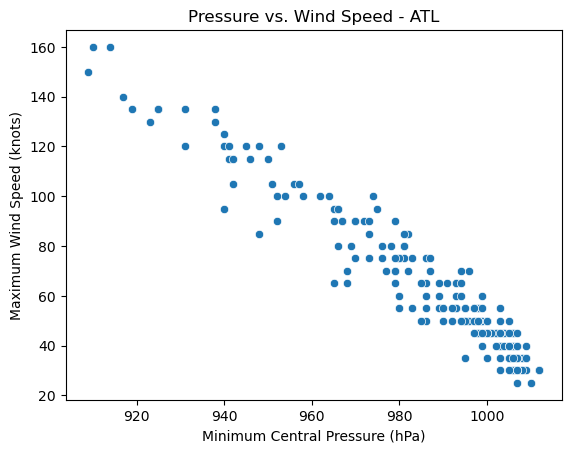

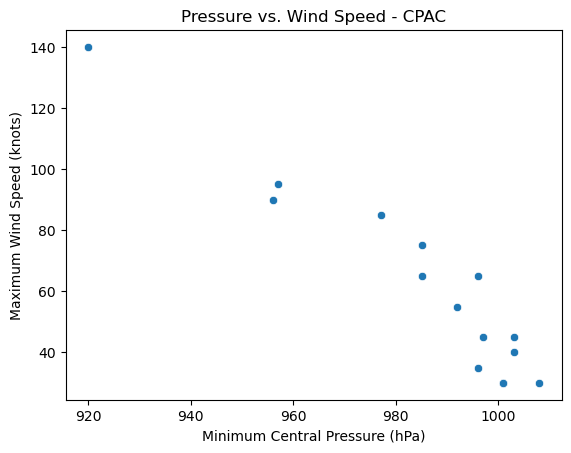

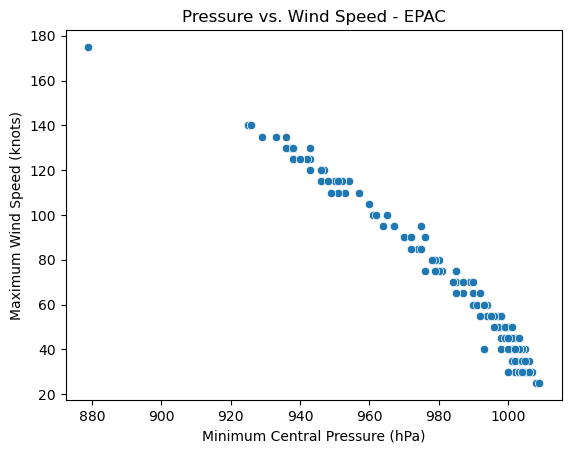

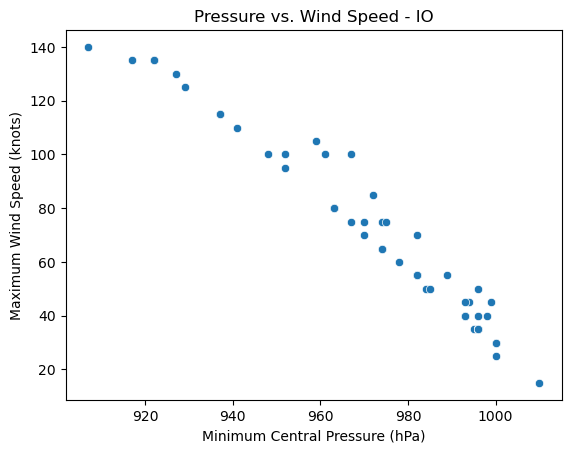

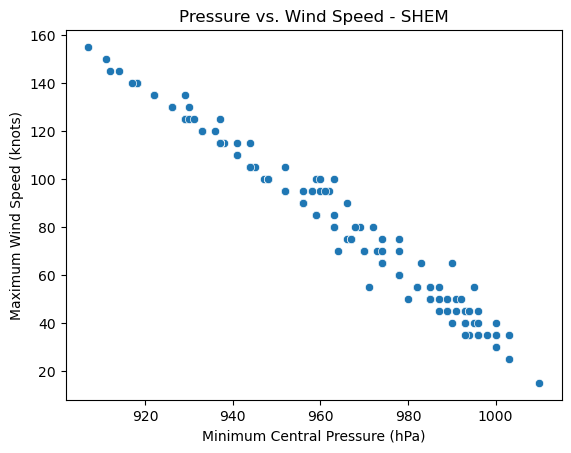

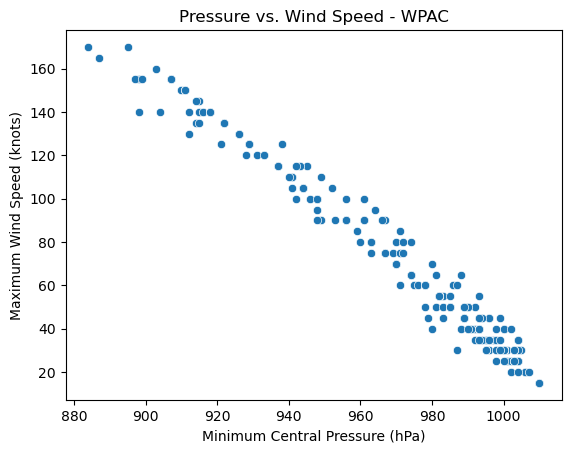

In [50]:
# one for each basin separately
plot_basin_scatterplot(peak_intensity, "ATL")
plot_basin_scatterplot(peak_intensity, "CPAC")
plot_basin_scatterplot(peak_intensity, "EPAC")
plot_basin_scatterplot(peak_intensity, "IO")
plot_basin_scatterplot(peak_intensity, "SHEM")
plot_basin_scatterplot(peak_intensity, "WPAC")

Let's do the same for the filtered dataset.

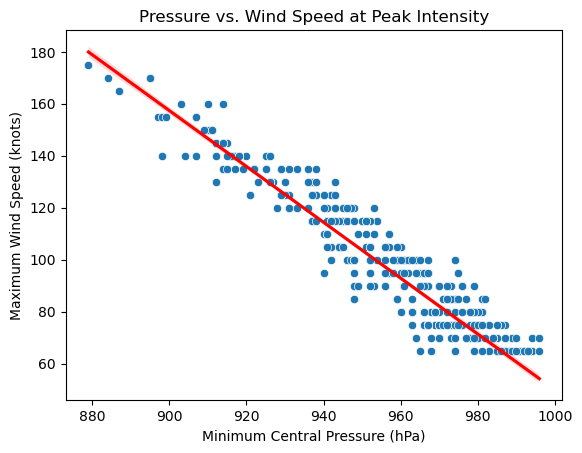

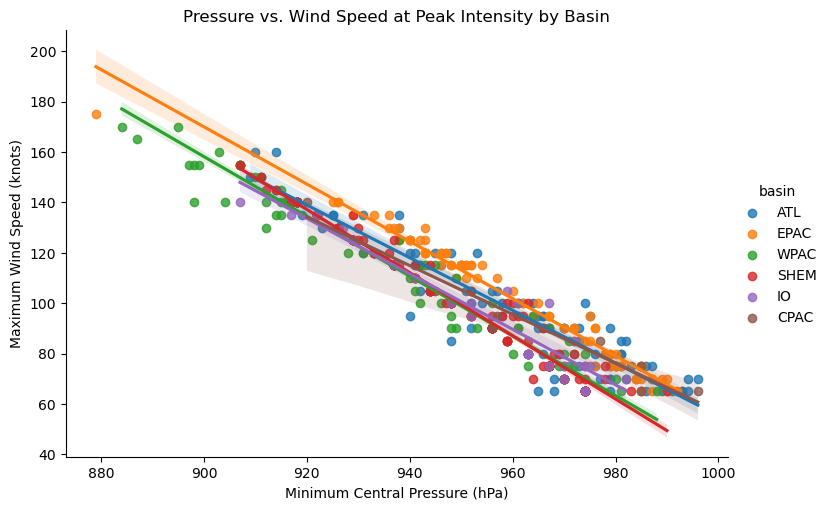

In [51]:
# Pressure-Wind Relationship
sns.scatterplot(data=peak_intensity_fil.to_pandas(), x='min_pressure', y='max_wind_speed')
sns.regplot(data=peak_intensity_fil.to_pandas(), x='min_pressure', y='max_wind_speed', scatter=False, color='red')
plt.title('Pressure vs. Wind Speed at Peak Intensity')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

# grouping by 'basin'
sns.lmplot(data=peak_intensity_fil.to_pandas(), x='min_pressure', y='max_wind_speed', hue='basin', aspect=1.5)
plt.title('Pressure vs. Wind Speed at Peak Intensity by Basin')
plt.xlabel('Minimum Central Pressure (hPa)')
plt.ylabel('Maximum Wind Speed (knots)')
plt.show()

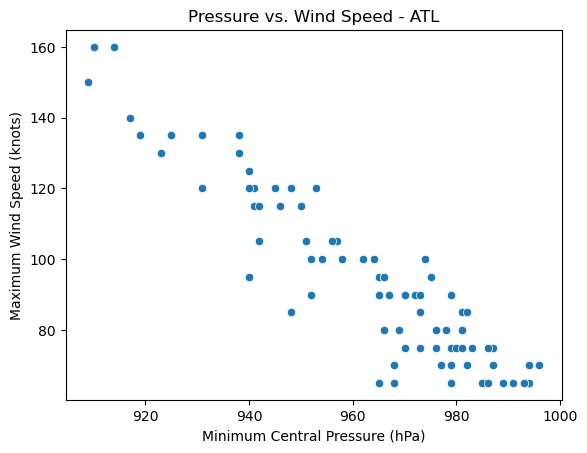

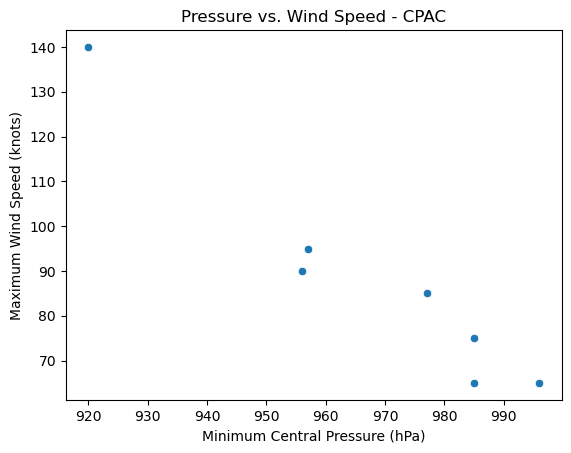

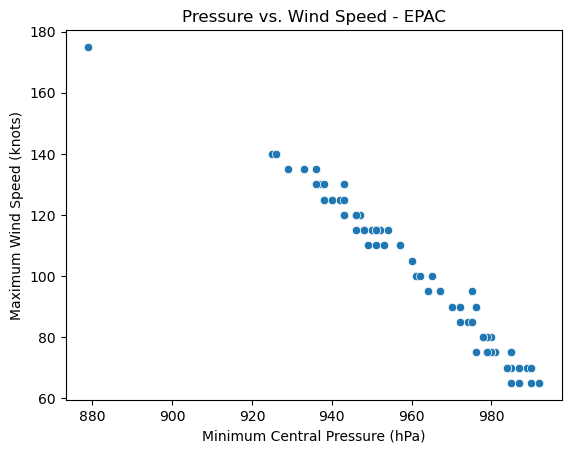

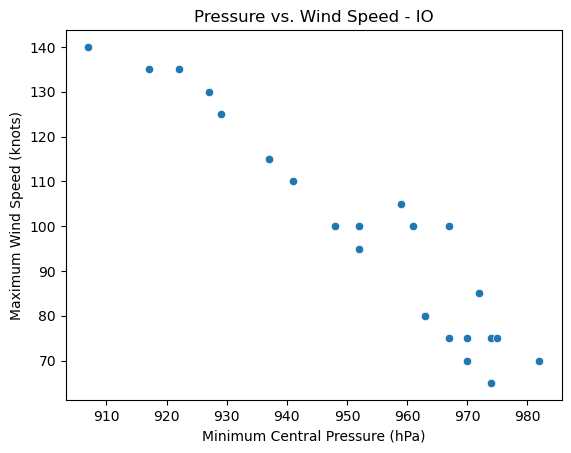

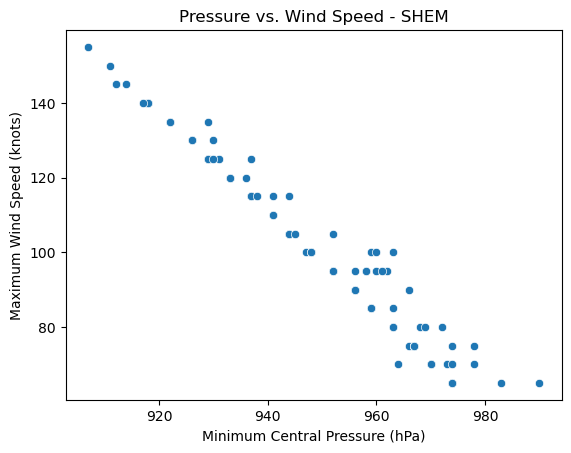

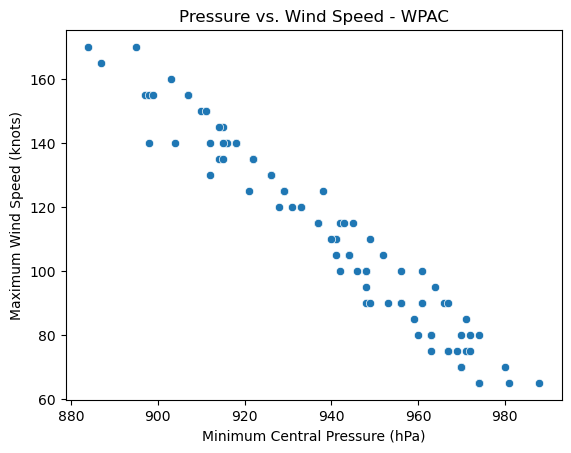

In [52]:
# one for each basin separately
plot_basin_scatterplot(peak_intensity_fil, "ATL")
plot_basin_scatterplot(peak_intensity_fil, "CPAC")
plot_basin_scatterplot(peak_intensity_fil, "EPAC")
plot_basin_scatterplot(peak_intensity_fil, "IO")
plot_basin_scatterplot(peak_intensity_fil, "SHEM")
plot_basin_scatterplot(peak_intensity_fil, "WPAC")

### Plotting Storm Center and Lightning Density
We plot storm centers and lightning for a select few TCs to perform a quick sanity check of the data. We compare with the plots found on the [WWLLN website](https://wwlln.net/storms/). Restart the kernel here to free up memory and import the necessary libraries and files.

In [3]:
# Import libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import polars as pl

We load only a portion of the data due to memory restrictions. If your machine allows for the entire dataset, remove the `n_rows` parameter from the `pl.read_csv` line.

In [ ]:
# Load wwlln data for lightning density plots
# Load only a portion bc of limited memory
wwlln_data = pl.read_csv("../data_pipeline/intermediate_data/Filtered_WWLLN_Locations.txt", separator = " ", n_rows=300000)
wwlln_data.head()

#### Seymour (EPAC_16_20)
We pick out one day for one TC to plot the lightning density. Here we pick Seymour (EPAC_16_20).

In [ ]:
# Pick out one day for one TC to plot lightning density
# Seymour
wwlln_subset = wwlln_data.filter((pl.col("day") == 23) & (pl.col("storm_name") == "Seymour"))
wwlln_subset.head()

year,month,day,hour,min,sec,lat,lon,distance_from_storm_center_km_east,distance_from_storm_center_km_north,storm_code,storm_name,hypotenuse_disance_from_storm_center,inner_core_ind,rainband_ind
i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,str,str,f64,i64,i64
2016,10,23,0,0,9.0007,14.3232,-101.2953,43.6018,224.97,"""EPAC_16_20""","""Seymour""",229.156318,0,1
2016,10,23,0,0,9.0006,14.3486,-101.5017,21.3621,227.794,"""EPAC_16_20""","""Seymour""",228.793457,0,1
2016,10,23,0,0,9.0007,14.2884,-101.3027,42.8111,221.1,"""EPAC_16_20""","""Seymour""",225.206572,0,1
2016,10,23,0,0,10.3551,19.8999,-101.6446,5.79237,845.07,"""EPAC_16_20""","""Seymour""",845.089851,0,0
2016,10,23,0,1,17.7625,20.8354,-102.3649,-69.0987,949.093,"""EPAC_16_20""","""Seymour""",951.60504,0,0


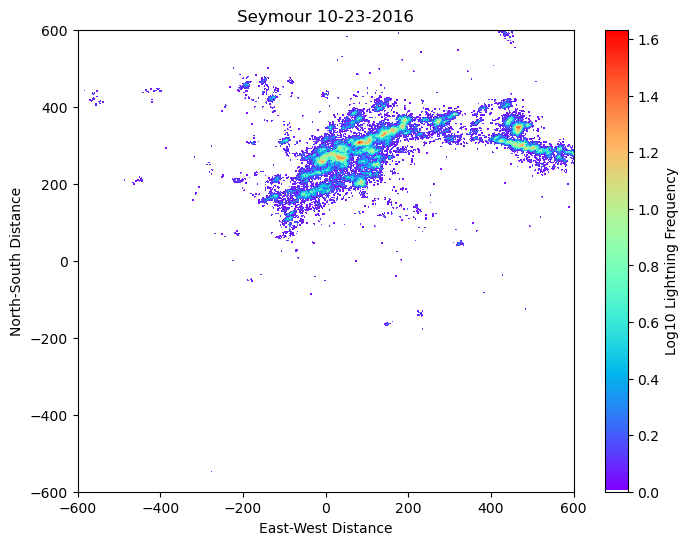

In [ ]:
# Plot the lightning density
x = wwlln_subset["distance_from_storm_center_km_east"]
y = wwlln_subset["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=1000)

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,
    aspect='auto'
)
plt.xlim(-600, 600)
plt.ylim(-600, 600)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Seymour 10-23-2016')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

Let's look at the inner core and rainband separately to get a feel for the lightning data.

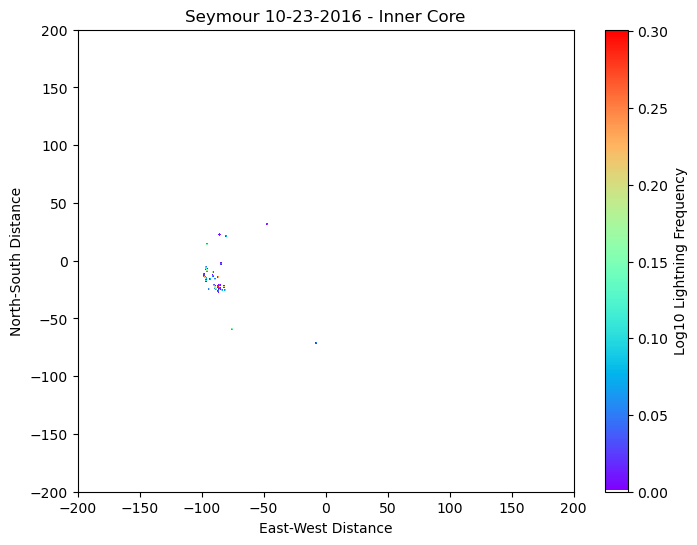

In [ ]:
# Plot the lightning density for inner core only
wwlln_innercore = wwlln_subset.filter(pl.col("inner_core_ind") == 1)

x = wwlln_innercore["distance_from_storm_center_km_east"]
y = wwlln_innercore["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Seymour 10-23-2016 - Inner Core')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

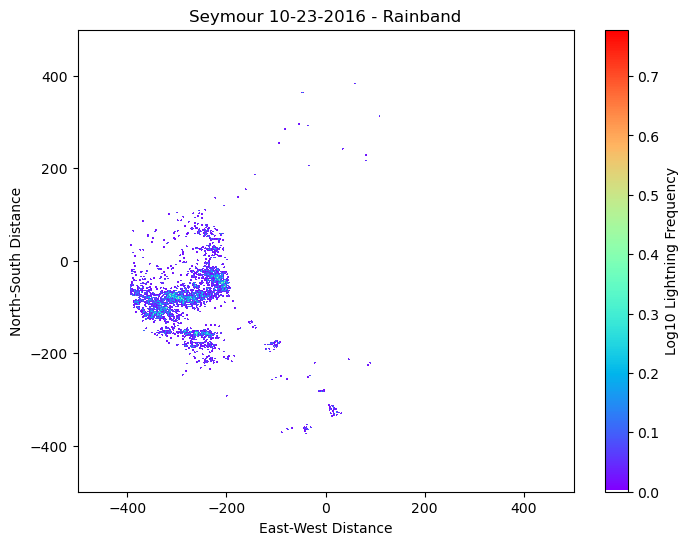

In [ ]:
# Plot the lightning density for rainband only
wwlln_rainband = wwlln_subset.filter(pl.col("rainband_ind") == 1)

x = wwlln_rainband["distance_from_storm_center_km_east"]
y = wwlln_rainband["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Seymour 10-23-2016 - Rainband')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

Next, we plot the storm center's path using the track data.

In [ ]:
# Plot the same TC's center path using the trackfile
# Subset to the same TC as above
subset_storm_data = storm_data.filter(pl.col("storm_code") == "EPAC_16_20")
subset_storm_data.head()

# Combine the time columns into one timestamp column
subset_storm_data = subset_storm_data.with_columns(
    (pl.col("year").cast(str) + "-" +
     pl.col("month").cast(str).str.zfill(2) + "-" +
     pl.col("day").cast(str).str.zfill(2) + " " +
     pl.col("hour").cast(str).str.zfill(2) + ":00").alias("timestamp")
)

subset_storm_data = subset_storm_data.with_columns(
    pl.col("timestamp").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M").alias("timestamp")
)

# Add order column for sorting
subset_storm_data = subset_storm_data.with_columns(
    pl.arange(1, subset_storm_data.height + 1).alias("order")
)

subset_storm_data.head()

year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name,category,basin,timestamp,order
i64,i64,i64,i64,f64,f64,i64,i64,str,str,i64,str,datetime[μs],i64
2016,10,22,6,11.4,-98.4,1007,25,"""EPAC_16_20""","""Seymour""",4,"""EPAC""",2016-10-22 06:00:00,1
2016,10,22,12,11.7,-99.5,1007,25,"""EPAC_16_20""","""Seymour""",4,"""EPAC""",2016-10-22 12:00:00,2
2016,10,22,18,12.0,-100.6,1007,25,"""EPAC_16_20""","""Seymour""",4,"""EPAC""",2016-10-22 18:00:00,3
2016,10,23,0,12.3,-101.7,1007,25,"""EPAC_16_20""","""Seymour""",4,"""EPAC""",2016-10-23 00:00:00,4
2016,10,23,6,12.7,-102.9,1007,30,"""EPAC_16_20""","""Seymour""",4,"""EPAC""",2016-10-23 06:00:00,5


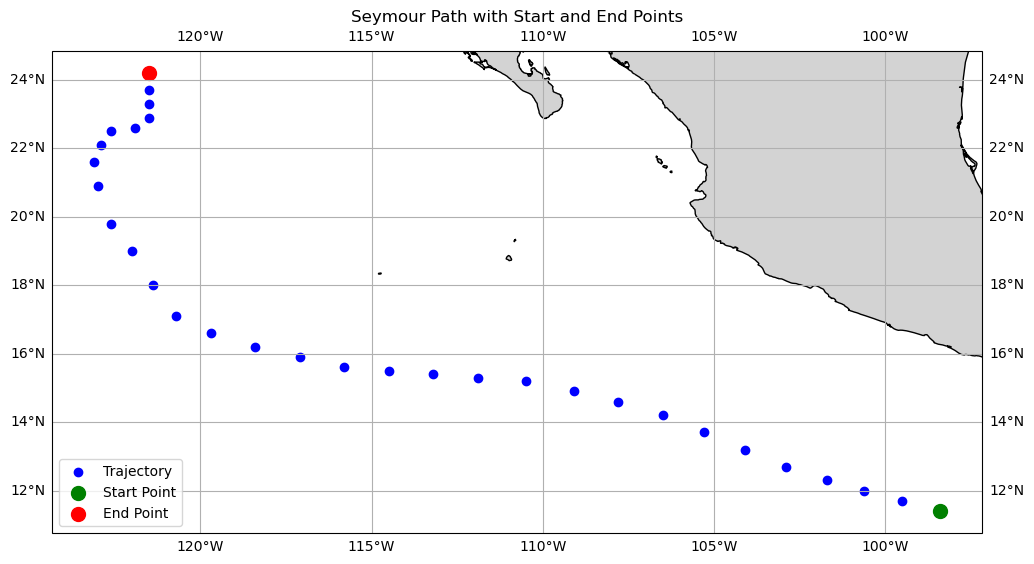

In [ ]:
# Convert to pandas dataframe
subset_storm_data_pd = subset_storm_data.to_pandas()

longitude = subset_storm_data_pd["lon"]
latitude = subset_storm_data_pd["lat"]

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot all points
ax.scatter(longitude, latitude, marker='o', color='blue', label='Trajectory', transform=ccrs.PlateCarree())

# Highlight start point in green
ax.scatter(longitude[0], latitude[0], color='green', s=100, label='Start Point', transform=ccrs.PlateCarree())

# Highlight end point in red
ax.scatter(longitude[len(longitude)-1], latitude[len(latitude)-1], color='red', s=100, label='End Point', transform=ccrs.PlateCarree())

plt.legend(loc='lower left')
plt.title("Seymour Path with Start and End Points")

plt.show()

#### Hagibis (WPAC_19_20)
Let's do the same for Hagibis (WPAC_19_20).

In [ ]:
# Pick out one day for one TC to plot lightning density
# Hagibis
wwlln_subset = wwlln_data.filter((pl.col("day") == 4) & (pl.col("storm_code") == "WPAC_19_20"))
wwlln_subset.head()

year,month,day,hour,min,sec,lat,lon,distance_from_storm_center_km_east,distance_from_storm_center_km_north,storm_code,storm_name,hypotenuse_disance_from_storm_center,inner_core_ind,rainband_ind
i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,str,str,f64,i64,i64
2019,10,4,5,56,39.0844,14.9657,165.8016,-96.509,-14.9335,"""WPAC_19_20""","""Hagibis""",97.657547,1,0
2019,10,4,5,56,39.4465,14.9722,165.7861,-98.1711,-14.2107,"""WPAC_19_20""","""Hagibis""",99.194299,1,0
2019,10,4,5,57,17.8118,7.0974,164.2618,-269.038,-889.849,"""WPAC_19_20""","""Hagibis""",929.630404,0,0
2019,10,4,5,57,17.8124,8.3837,165.0814,-178.057,-746.818,"""WPAC_19_20""","""Hagibis""",767.750884,0,0
2019,10,4,5,57,18.6257,15.0244,165.7072,-106.62,-8.40634,"""WPAC_19_20""","""Hagibis""",106.950881,0,0


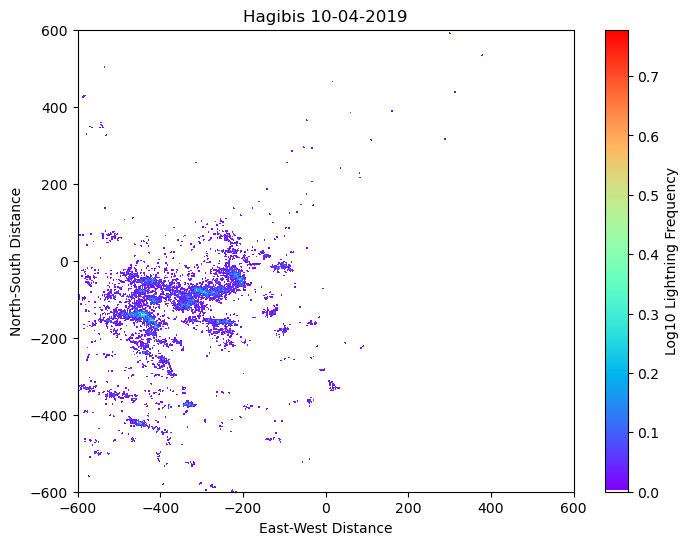

In [ ]:
# Plot the lightning density
x = wwlln_subset["distance_from_storm_center_km_east"]
y = wwlln_subset["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=2000)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-600, 600)
plt.ylim(-600, 600)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Hagibis 10-04-2019')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

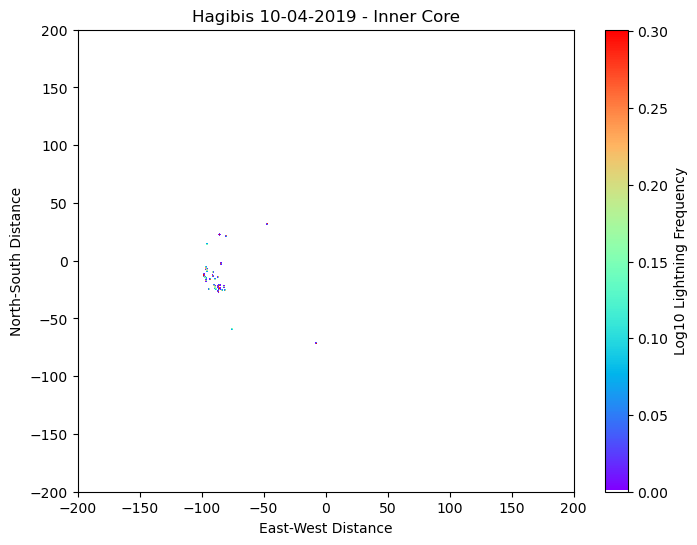

In [ ]:
# Plot the lightning density for inner core only
wwlln_innercore = wwlln_subset.filter(pl.col("inner_core_ind") == 1)

x = wwlln_innercore["distance_from_storm_center_km_east"]
y = wwlln_innercore["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Hagibis 10-04-2019 - Inner Core')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

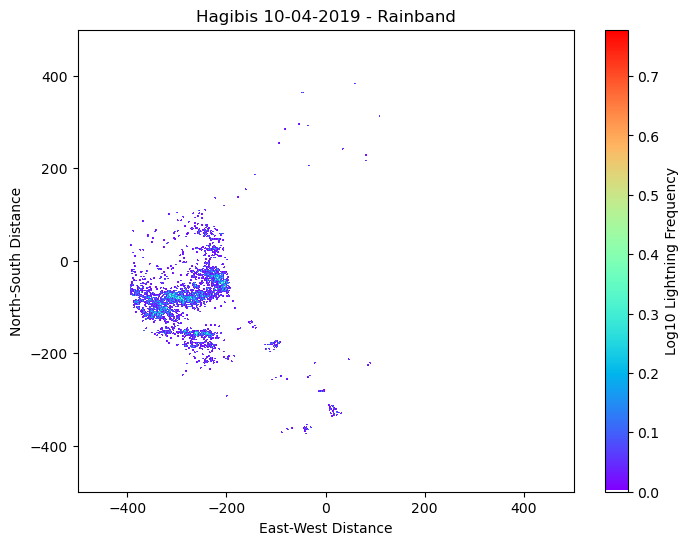

In [ ]:
# Plot the lightning density for rainband only
wwlln_rainband = wwlln_subset.filter(pl.col("rainband_ind") == 1)

x = wwlln_rainband["distance_from_storm_center_km_east"]
y = wwlln_rainband["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Hagibis 10-04-2019 - Rainband')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

In [ ]:
# Plot the same TC's center path using the trackfile
# Subset to the same TC as above
subset_storm_data = storm_data.filter(pl.col("storm_code") == "WPAC_19_20")
subset_storm_data.head()

# Combine the time columns into one timestamp column
subset_storm_data = subset_storm_data.with_columns(
    (pl.col("year").cast(str) + "-" +
     pl.col("month").cast(str).str.zfill(2) + "-" +
     pl.col("day").cast(str).str.zfill(2) + " " +
     pl.col("hour").cast(str).str.zfill(2) + ":00").alias("timestamp")
)

subset_storm_data = subset_storm_data.with_columns(
    pl.col("timestamp").str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M").alias("timestamp")
)

# Add order column for sorting
subset_storm_data = subset_storm_data.with_columns(
    pl.arange(1, subset_storm_data.height + 1).alias("order")
)

subset_storm_data.head()

year,month,day,hour,lat,lon,pressure,knots,storm_code,storm_name,category,basin,timestamp,order
i64,i64,i64,i64,f64,f64,i64,i64,str,str,i64,str,datetime[μs],i64
2019,10,4,6,15.1,166.7,1010,15,"""WPAC_19_20""","""Hagibis""",5,"""WPAC""",2019-10-04 06:00:00,1
2019,10,4,12,15.1,165.4,1006,15,"""WPAC_19_20""","""Hagibis""",5,"""WPAC""",2019-10-04 12:00:00,2
2019,10,4,18,15.2,164.2,1006,20,"""WPAC_19_20""","""Hagibis""",5,"""WPAC""",2019-10-04 18:00:00,3
2019,10,5,0,15.2,162.6,1006,20,"""WPAC_19_20""","""Hagibis""",5,"""WPAC""",2019-10-05 00:00:00,4
2019,10,5,6,15.2,161.1,1005,25,"""WPAC_19_20""","""Hagibis""",5,"""WPAC""",2019-10-05 06:00:00,5


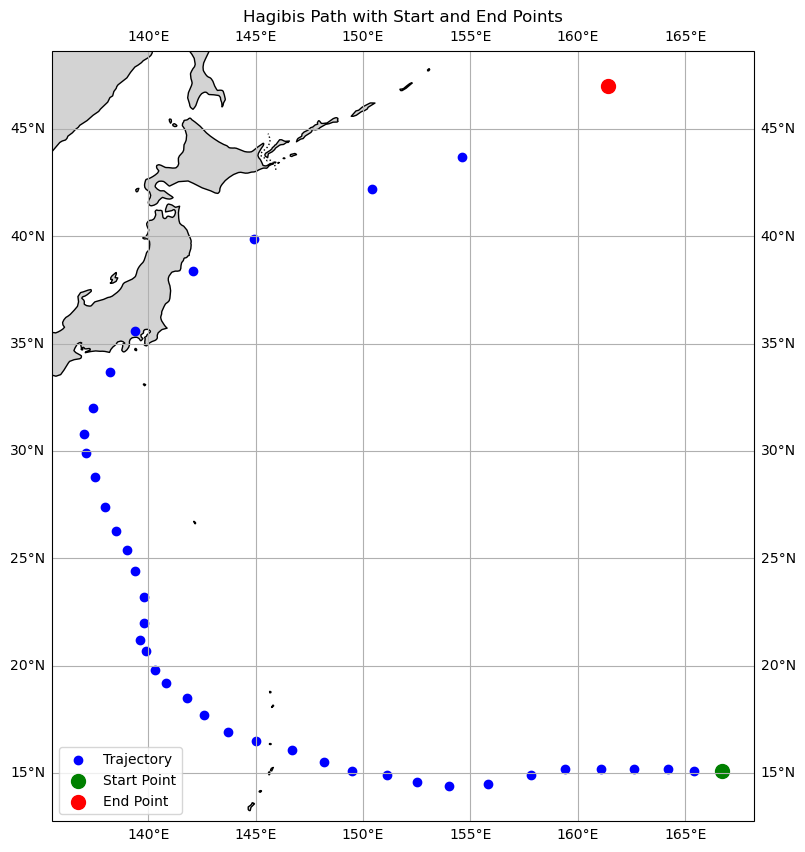

In [ ]:
# Convert to pandas dataframe
subset_storm_data_pd = subset_storm_data.to_pandas()

longitude = subset_storm_data_pd["lon"]
latitude = subset_storm_data_pd["lat"]

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot all points
ax.scatter(longitude, latitude, marker='o', color='blue', label='Trajectory', transform=ccrs.PlateCarree())

# Highlight start point in green
ax.scatter(longitude[0], latitude[0], color='green', s=100, label='Start Point', transform=ccrs.PlateCarree())

# Highlight end point in red
ax.scatter(longitude[len(longitude)-1], latitude[len(latitude)-1], color='red', s=100, label='End Point', transform=ccrs.PlateCarree())

plt.legend(loc='lower left')
plt.title("Hagibis Path with Start and End Points")

plt.show()

#### Jose (ATL_17_12)
Do the same for Jose (ATL_17_12).

In [ ]:
# Pick out one day for one TC to plot lightning density
# Jose
wwlln_subset = wwlln_data.filter((pl.col("day") == 9) & (pl.col("storm_code") == "ATL_17_12"))
wwlln_subset.head()

year,month,day,hour,min,sec,lat,lon,distance_from_storm_center_km_east,distance_from_storm_center_km_north,storm_code,storm_name,hypotenuse_disance_from_storm_center,inner_core_ind,rainband_ind
i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,str,str,f64,i64,i64
2017,9,9,0,0,2.8396,25.0993,-62.8137,-404.146,933.96,"""ATL_17_12""","""Jose""",1017.651842,0,0
2017,9,9,0,0,9.9983,25.3398,-61.9572,-317.28,960.702,"""ATL_17_12""","""Jose""",1011.738569,0,0
2017,9,9,0,0,10.0778,25.2774,-61.9308,-314.789,953.763,"""ATL_17_12""","""Jose""",1004.368446,0,0
2017,9,9,0,0,34.4835,25.0828,-61.8484,-306.994,932.125,"""ATL_17_12""","""Jose""",981.377772,0,0
2017,9,9,0,0,34.656,25.1839,-61.8101,-302.886,943.367,"""ATL_17_12""","""Jose""",990.798277,0,0


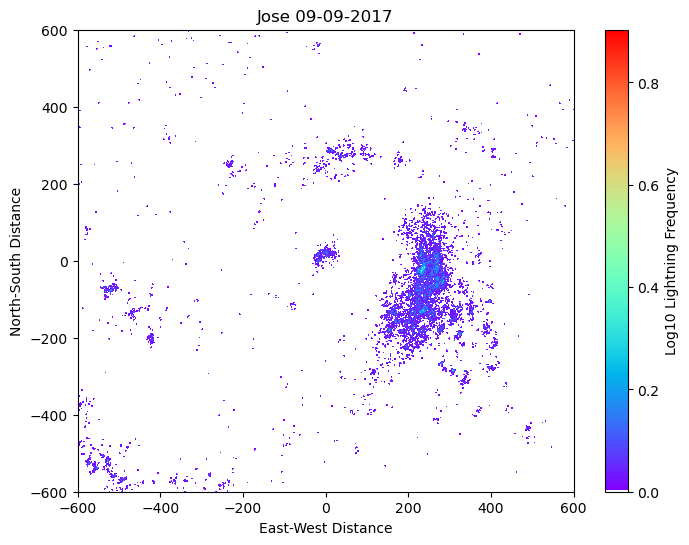

In [ ]:
# Plot the lightning density
x = wwlln_subset["distance_from_storm_center_km_east"]
y = wwlln_subset["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=2000)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-600, 600)
plt.ylim(-600, 600)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Jose 09-09-2017')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

We can see a stark separation between the inner core and rainband for this day. Let's split the graphs to see what falls into our inner core and rainband lightning definitions.

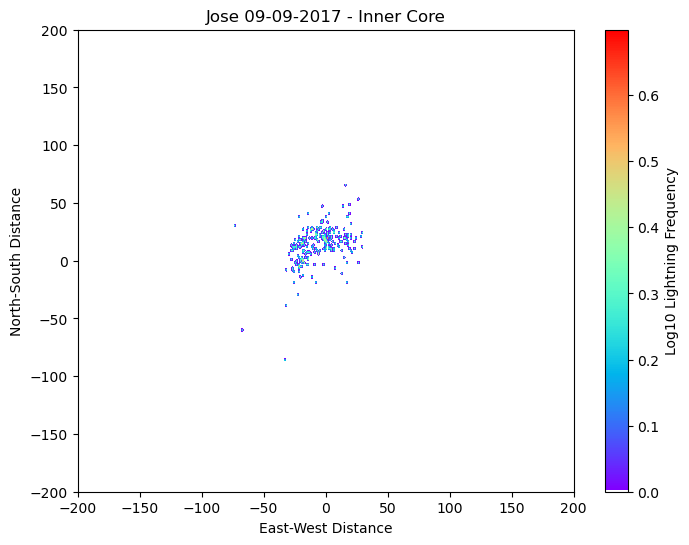

In [ ]:
# Plot the lightning density for inner core only
wwlln_innercore = wwlln_subset.filter(pl.col("inner_core_ind") == 1)

x = wwlln_innercore["distance_from_storm_center_km_east"]
y = wwlln_innercore["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Jose 09-09-2017 - Inner Core')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

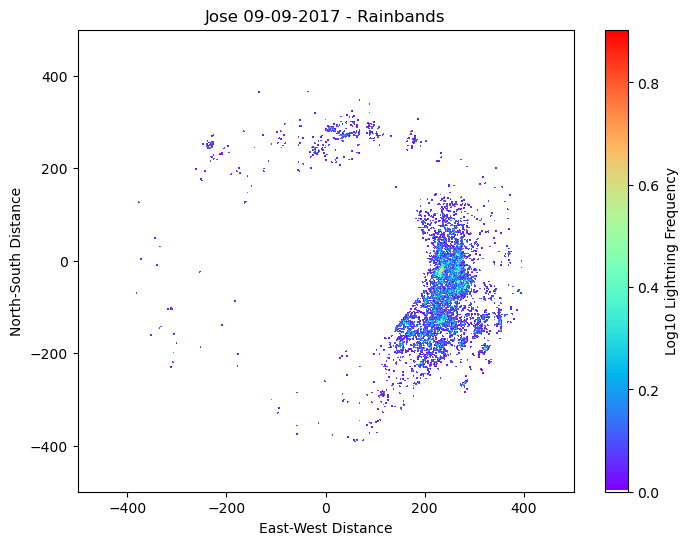

In [ ]:
# Plot the lightning density for rainbands only
wwlln_rainband = wwlln_subset.filter(pl.col("rainband_ind") == 1)

x = wwlln_rainband["distance_from_storm_center_km_east"]
y = wwlln_rainband["distance_from_storm_center_km_north"]

cmap = ListedColormap(['white'] + plt.cm.rainbow(np.linspace(0, 1, 255)).tolist())

# 2D Histogram (heatmap)
plt.figure(figsize=(8, 6))
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500)  # Adjust bins as needed

heatmap_log = np.log10(heatmap + 1) # log transformation to match the wwlln site

# Plot heatmap
plt.imshow(
    heatmap_log.T,  # Transpose because histogram2d flips axes
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap=cmap,  # Choose a color map (e.g., 'coolwarm', 'viridis')
    aspect='auto'
)
plt.xlim(-500, 500)
plt.ylim(-500, 500)
plt.colorbar(label='Log10 Lightning Frequency')
plt.title('Jose 09-09-2017 - Rainbands')
plt.xlabel('East-West Distance')
plt.ylabel('North-South Distance')
plt.grid(False)
plt.show()

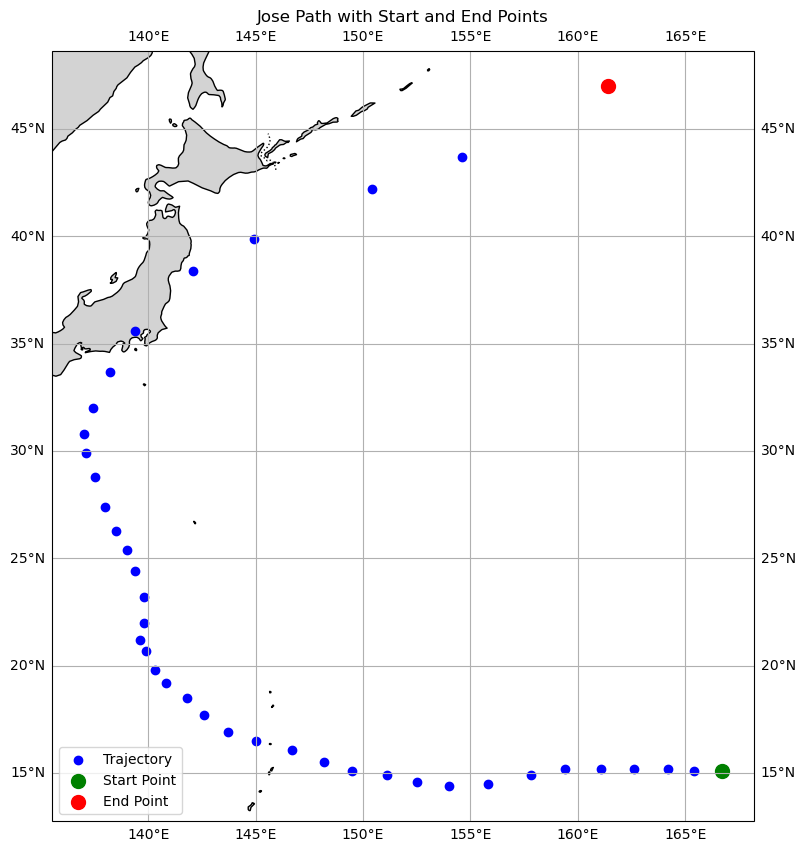

In [ ]:
# Convert to pandas dataframe
subset_storm_data_pd = subset_storm_data.to_pandas()

longitude = subset_storm_data_pd["lon"]
latitude = subset_storm_data_pd["lat"]

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot all points
ax.scatter(longitude, latitude, marker='o', color='blue', label='Trajectory', transform=ccrs.PlateCarree())

# Highlight start point in green
ax.scatter(longitude[0], latitude[0], color='green', s=100, label='Start Point', transform=ccrs.PlateCarree())

# Highlight end point in red
ax.scatter(longitude[len(longitude)-1], latitude[len(latitude)-1], color='red', s=100, label='End Point', transform=ccrs.PlateCarree())

plt.legend(loc='lower left')
plt.title("Jose Path with Start and End Points")

plt.show()

We notice that rainband lightning usually occurs in a particular section, and is not evenly distributed around storm center. 